# <center>TP 1 : Linear Regression<center>
-----------------------------

----------------
## Chargement des packages

In [1]:
import math as m                    
import numpy as np  
import pandas as pd

from sklearn import linear_model, model_selection
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from statsmodels.nonparametric.kde import KDEUnivariate #
import statsmodels.api as sm #
from scipy.stats import gaussian_kde #
from inspect import getsourcelines   #
import random #
import string #
import time #
import urllib #
import matplotlib.pyplot as plt
from matplotlib import rc
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns  #        
import sys #

from os import mkdir, rmdir, path 

from IPython.display import HTML #
from IPython.display import display #

%matplotlib notebook

---------------------
## Question 1 :

Commençons par récupérer les données pour en faire des dataframe.

In [2]:
# Chargement des données et création du dataframe df
url = 'https://bitbucket.org/portierf/shared_files/downloads/Galton.txt'
df = pd.read_csv(url, sep='\t')
print('Le fichier contient ' + str(df.shape[0]) + ' lignes.\n') 
df.head()

Le fichier contient 898 lignes.



,Family,Father,Mother,Gender,Height,Kids
0,1,78.5,67.0,M,73.2,4
1,1,78.5,67.0,F,69.2,4
2,1,78.5,67.0,F,69.0,4
3,1,78.5,67.0,F,69.0,4
4,2,75.5,66.5,M,73.5,4


In [3]:
# Vérification de données manquantes 
null_data = df[df.isnull().any(axis=1)]
print("Il y a " + str(df.isnull().sum().sum()) +
      ' valeurs manquantes.')

Il y a 0 valeurs manquantes.


Il n'y a donc **pas de données manquantes** dans cette table.

------------
## Question 2 :

Ajoutons une colonne "MeanParents" contenant la taille du parent moyen à notre dataframe.

In [4]:
# Création de la colonne "MeanParents" dans le dataframe df
df['MeanParents'] = 0.5 * (df['Father'] + 1.08 * df['Mother'])
df.head()

,Family,Father,Mother,Gender,Height,Kids,MeanParents
0,1,78.5,67.0,M,73.2,4,75.43
1,1,78.5,67.0,F,69.2,4,75.43
2,1,78.5,67.0,F,69.0,4,75.43
3,1,78.5,67.0,F,69.0,4,75.43
4,2,75.5,66.5,M,73.5,4,73.66


On note $x_i$ la taille du parent moyen pour la famille i et $y_i$ la taille de l’enfant. On écrit $y_i = \theta_1 x_i + \theta_0 + \epsilon_i$ et on modélise les variables $\epsilon_i$ comme centrées, indépendantes de même
variance $\sigma^2$ inconnue.

--------------------
## Question 3 :

On va tracer le nuage de point ($x_i$, $y_i$) pour $1 ≤ i ≤ n$ où n est le nombre d’observations figurant dans les données, donc **898** d'après la question 1.

<IPython.core.display.Javascript object>


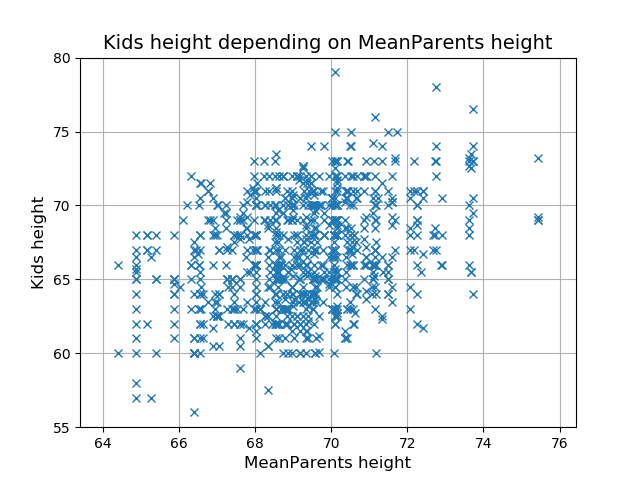

In [33]:
plt.figure()
y = df['Height']
x = df[['MeanParents']]
plt.plot(x, y, 'x',label="")
plt.ylabel('Kids height', fontsize=12)
plt.ylim([df['Height'].min()-1, df['Height'].max()+1])
plt.xlabel('MeanParents height', fontsize=12)
plt.xlim([df['MeanParents'].min()-1, df['MeanParents'].max()+1])
plt.title("Kids height depending on MeanParents height", fontsize=14)
plt.grid(True)
plt.show()

----------------------
## Question 4 :

Estimation de $\theta_0$, $\theta_1$ par $\widehat\theta_0$, $\widehat\theta_1$ en utilisant la fonction `LinearRegression` de `sklearn`. 

In [52]:
x = df[['MeanParents']]
y = df['Height']
skl_lm = linear_model.LinearRegression()
skl_lm.fit(x, y)

y_estim = skl_lm.predict(x)
theta0 = skl_lm.intercept_
y_mean = y.mean()
theta1 = skl_lm.coef_[0]


print('Theta_0 vaut {}'.format(theta0))
print('Theta_1 vaut {}'.format(theta1))

Theta_0 vaut 22.376205683004223
Theta_1 vaut 0.6411903795908174


Calcul et visualisation des valeurs prédites $\widehat y_i = \widehat\theta_1 x_i + \widehat\theta_0$ et $y_i$ sur un même graphique.

<IPython.core.display.Javascript object>


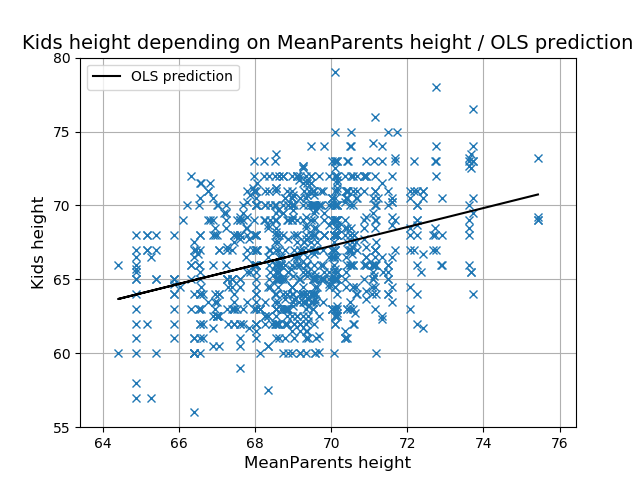

In [53]:
fig = plt.figure()
y = df['Height']
x = df[['MeanParents']]
plt.plot(x, y, 'x',label="")
plt.plot(x, y_estim, label='OLS prediction', c='k')
plt.xlabel('MeanParents height', fontsize=12)
plt.xlim([df['MeanParents'].min()-1, df['MeanParents'].max()+1])
plt.ylabel('Kids height', fontsize=12)
plt.ylim([df['Height'].min()-1, df['Height'].max()+1])
plt.title("Kids height depending on MeanParents height / OLS prediction", fontsize=14)
plt.legend()
plt.grid(True)
plt.show()


---------------------------
## Question 5 :

Nous allons recentrer nos données et vérifier que la prédiction effectuée dans le modèle centré est bien la même que celle effectuée précédemment. Pour rappel, les formules du cours nous donnaient :

<center>
$\widehat\theta_0= \overline{y}_n -\widehat{\theta}_1 \overline{x}_n$,
$\qquad  \widehat\theta_1=  \displaystyle\frac{\overset{n}{\underset{i=1}{\sum}} (x_i-\overline{x}_n)(y_i -\overline{y}_n)}{\overset{n}{\underset{i=1}{\sum}} (x_i-\overline{x}_n)^2}$
<center>

In [39]:
# Calcul du y moyen
y_mean = y.mean()
x_mean = (x.mean(axis=0)).squeeze()

# Calcul de la variance pour le dénominateur de theta1
x_var = x.var(ddof=0).squeeze()


# Calcul de theta0 et theta1 avec les formules du cours permettant de recentrer les données
theta1_manual = (((x.squeeze() - x_mean) * (y - y_mean)).mean()) / x_var
theta0_manual = y_mean - theta1_manual * x_mean
print('Theta0 vaut ' + str(theta0))
print('Theta0 "manuel" vaut ' + str(theta0_manual) +'\n')
print('Theta1 vaut ' + str(theta1))
print('Theta1 "manuel" vaut ' + str(theta1_manual) +'\n')


print('Les deux valeurs de theta0' +
      ' sont-elles identiques ? {}, et theta0={}'.format(np.isclose(theta0, theta0_manual),theta0))
print('Les deux valeurs de theta1' +
      ' sont-elles identiques ? {}, et theta1={}'.format(np.isclose(theta1, theta1_manual),theta1))

Theta0 vaut 22.376205683004223
Theta0 "manuel" vaut 22.376205683004265

Theta1 vaut 0.6411903795908174
Theta1 "manuel" vaut 0.6411903795908169

Les deux valeurs de theta0 sont-elles identiques ? True, et theta0=22.376205683004223
Les deux valeurs de theta1 sont-elles identiques ? True, et theta1=0.6411903795908174


Ou bien, deuxième méthode de calcul :

In [56]:
x_center = x - np.mean(x)
y_center = y - np.mean(y)
skl_lm_center = linear_model.LinearRegression(fit_intercept = False)
skl_lm_center.fit(x_center, y_center)
theta1_center = skl_lm_center.coef_[0]

print('Les deux valeurs de theta1' +
      ' sont-elles identiques ? {}, et theta1={}'.format(np.isclose(theta1, theta1_center),theta1))

Les deux valeurs de theta1 sont-elles identiques ? True, et theta1=0.6411903795908174


Nous retrouvons donc bien une **pente identique** sur la droite de régression entre le modèle précédent et le modèle centré.

----------------------------
## Question 6 :

Visualisons l’histogramme des résidus $r_i = y_i − \widehat y_i$, ou ($\widehat y_i$ est la valeur prédite par le modèle)

<IPython.core.display.Javascript object>


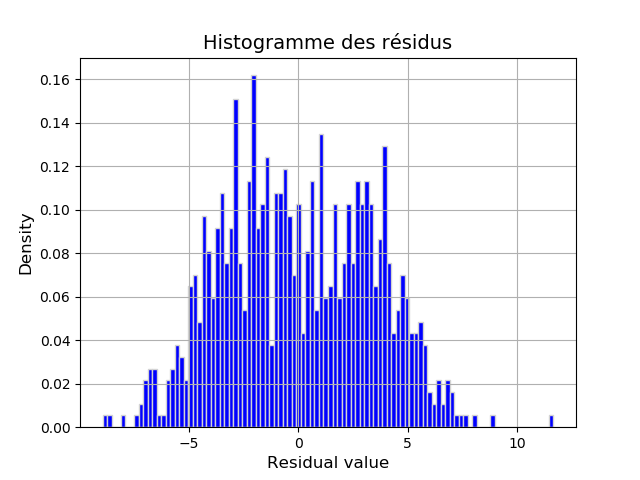

In [60]:
plt.figure()
residual = y - y_estim
#x_grid = np.linspace(-10, 10, num=150)
plt.title('Histogramme des résidus', fontsize=14)
plt.xlabel('Residual value', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.hist(residual, density=True, bins=100, color='blue', edgecolor = 'lightgrey') 
plt.grid(True)
plt.show()



**L’hypothèse de normalité globale des résidus ne semble pas crédible**. En effet, la distribution, bien que centrée en zéro, semble être bimodale et n'atteind pas son maximum en zéro. La représentation ci-dessus semble être une addition de 2 gaussiennes.  Cela est logique de part la différence entre la taille moyenne des femmes et celle des hommes. Il sera donc plus judicieux de mener l'étude séparement par genre.

---------------------------
## Question 7 :

Sur un graphique similaire à celui de la question 3, sur lequel apparait le nuage de points et la droite de régression, nous allons représenter, à l’aide de deux couleurs différentes, les femmes et les hommes.

<IPython.core.display.Javascript object>


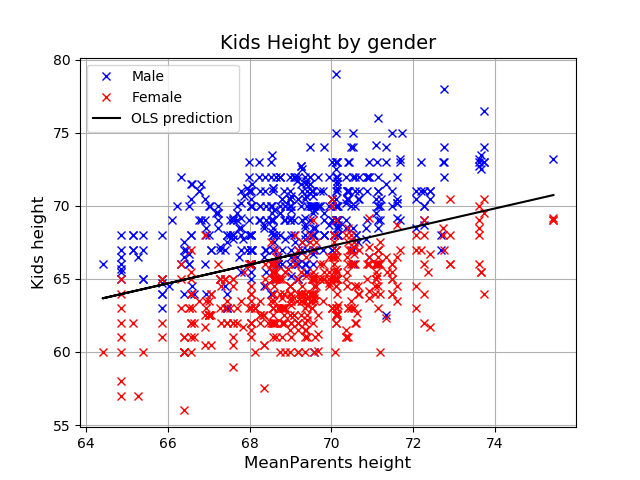

In [61]:
homme = df['Gender'] == 'M'
femme = df['Gender'] == 'F'
fig = plt.figure()
plt.plot(df['MeanParents'][homme], y[homme], 'x', c='blue', label="Male")
plt.plot(df['MeanParents'][femme], y[femme], 'x', c='red', label="Female")
plt.plot(x, y_estim, label='OLS prediction', c='k')
plt.xlabel('MeanParents height', fontsize=12)
plt.ylabel('Kids height', fontsize=12)
plt.title("Kids Height by gender", fontsize=14)
plt.legend()
plt.grid(True)
plt.show()

Comme le montre le graphique ci-dessus, on retrouve bien une **répartition bimodale** avec les hommes globalement plus grand que les femmes. Cela tend donc bien à confirmer ce que nous avons observé en question 6.

---------------------------
## Question 8 :

Effectuons donc une régression sur le groupe des hommes uniquement.

Theta0_H vaut 19.990999706486235
Theta1_H vaut 0.7120758362217019


<IPython.core.display.Javascript object>


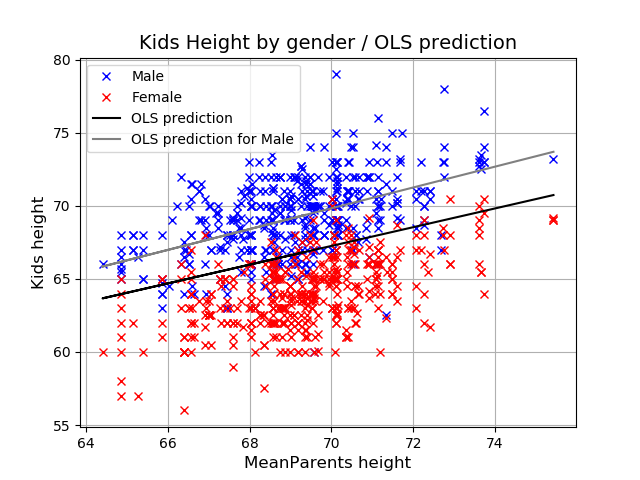

In [64]:
x_H = df[['MeanParents']][homme]  
y_H = df['Height'][homme]
skl_lm_H = linear_model.LinearRegression()
skl_lm_H.fit(x_H, y_H)

y_estim_H = skl_lm_H.predict(x_H)
theta0_H = skl_lm_H.intercept_
theta1_H = skl_lm_H.coef_[0]
y_mean_H = y_H.mean()

print('Theta0_H vaut {}'.format(theta0_H))
print('Theta1_H vaut {}'.format(theta1_H))


fig = plt.figure()
plt.plot(df['MeanParents'][homme], y[homme], 'x', c='blue', label="Male")
plt.plot(df['MeanParents'][femme], y[femme], 'x', c='red', label="Female")
plt.plot(x, y_estim, label='OLS prediction', c='k')
plt.plot(x_H, y_estim_H, label='OLS prediction for Male', c='grey') 
plt.xlabel('MeanParents height', fontsize=12)
plt.ylabel('Kids height', fontsize=12)
plt.title("Kids Height by gender / OLS prediction", fontsize=14)
plt.legend()
plt.grid(True)
plt.show()


Représentons alors la distribution des résidus avec ce modèle.

<IPython.core.display.Javascript object>


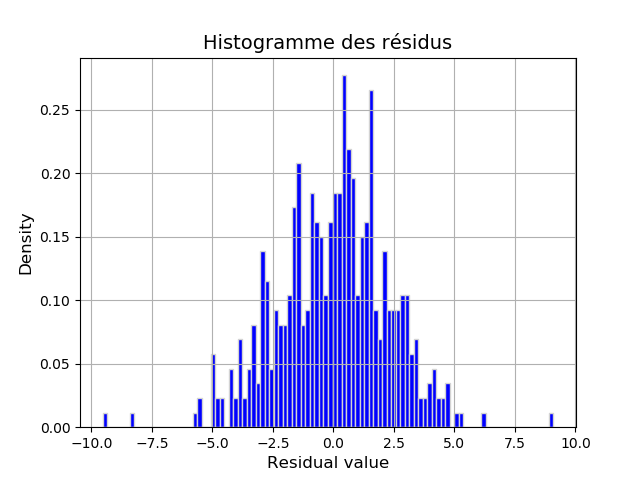

In [69]:
plt.figure()
residual_H = y_H - y_estim_H
plt.title('Histogramme des résidus', fontsize=14)
plt.xlabel('Residual value', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.hist(residual_H, density=True, bins=100, color='blue', edgecolor = 'lightgrey') 
plt.grid(True)
plt.show()

Avec ce modèle, les résidus sont beaucoup plus **centrés** qu'avec notre modèle précédent, et la répartition est **unimodale**.

---------------------
## Question 9 :

A l’aide d’un partitionnement aléatoire de l’échantillon, nous allons construire un échantillon de test
et un échantillon d’apprentissage. L’échantillon test contiendra 20% des données.


In [71]:
# Séparation des données avec 20% dans l'échantillon de test

df_train, df_test = train_test_split(df, test_size=0.2)

print("L'échantillon d'apprentissage à la forme suivante : {}".format(df_train.shape))
df_train.head()

L'échantillon d'apprentissage à la forme suivante : (718, 7)


,Family,Father,Mother,Gender,Height,Kids,MeanParents
186,49,71.5,64.5,F,62.0,7,70.58
869,198,64.0,64.0,M,68.0,7,66.56
46,15,73.0,66.5,F,66.7,3,72.41
815,185,66.0,59.0,F,64.0,15,64.86
666,155,68.0,60.0,M,64.0,7,66.40


In [73]:
print("L'échantillon de test à la forme suivante : {}".format(df_test.shape))
df_test.head()

L'échantillon de test à la forme suivante : (180, 7)


,Family,Father,Mother,Gender,Height,Kids,MeanParents
780,177,66.0,65.5,M,72.0,5,68.37
882,200,64.0,63.0,M,64.5,1,66.02
653,149,68.2,63.5,M,67.0,5,68.39
237,62,70.0,69.0,M,68.7,6,72.26
686,158,68.0,59.0,F,62.0,10,65.86


Estimons maintenant, sur l’échantillon d’apprentissage `data_train` deux modèles : un premier modèle basé uniquement sur les garçons, et un deuxième modèle basé sur l’échantillon complet. Pour cela, nous utiliserons, comme à la question 4, la fonction `LinearRegression` de `sklearn`.

In [88]:
homme_train = df_train['Gender'] == 'M'
femme_train = df_train['Gender'] == 'F'

homme_test = df_test['Gender'] == 'M'
femme_test = df_test['Gender'] == 'F'

# Calcul du modèle d'entraînement hommes

x_train_H = df_train[['MeanParents']][homme_train]
y_train_H = df_train['Height'][homme_train]
skl_lm_train_H = linear_model.LinearRegression()
skl_lm_train_H.fit(x_train_H, y_train_H)


y_train_estim_H = skl_lm_train_H.predict(x_train_H)
theta0_train_H = skl_lm_train_H.intercept_
theta1_train_H = skl_lm_train_H.coef_[0]
y_train_mean_H = y_train_H.mean()

print('Theta_0_train_H vaut {}'.format(theta0_train_H))
print('Theta_1_train_H vaut {}'.format(theta1_train_H))


Theta_0_train_H vaut 23.44093607481144
Theta_1_train_H vaut 0.6612626415345416


In [87]:
# Calcul du modèle d'entraînement complet

x_train = df_train[['MeanParents']]
y_train = df_train['Height']
skl_lm_train = linear_model.LinearRegression()
skl_lm_train.fit(x_train, y_train)


y_estim_train = skl_lm_train.predict(x_train)
theta0_train = skl_lm_train.intercept_
theta1_train = skl_lm_train.coef_[0]
y_train_mean = y_train.mean()

print('Theta_0_train vaut {}'.format(theta0_train))
print('Theta_1_train vaut {}'.format(theta1_train))


Theta_0_train vaut 25.477063793348094
Theta_1_train vaut 0.5953007995396143


In [84]:
# Calcul du prédicteur du modèle global sur l'échantillon de test
x_test = df_test[['MeanParents']]
y_test = df_test['Height']

y_test_estim = skl_lm_train.predict(x_test)

In [90]:
# Calcul du prédicteur du modèle homme sur l'échantillon test
x_test_H = df_test[['MeanParents']][homme_test]
y_test_H = df_test['Height'][homme_test]

y_test_estim_H = skl_lm_train_H.predict(x_test_H)

In [91]:
# Repésentons graphiquement ces résultats :



Comparons alors les deux prédicteurs sur le groupe "hommes" de l’échantillon test `data_test` en calculant le risque de prédiction :



<center>
$$
\frac{1}{|test|}\underset{i \in test}{\sum} (y_i - \widehat y_i)²
$$
<center>

Avec $\widehat y_i$ valeur prédite par le modèle.

In [92]:
#homme_test = df_test['Gender'] == 'M'
#femme_test = df_test['Gender'] == 'F'

# Calcul du modèle test hommes

#x_test_H = df_test[['MeanParents']][homme_test]
#y_test_H = df_test['Height'][homme_test]
skl_lm_test_H = linear_model.LinearRegression()
skl_lm_test_H.fit(x_test_H, y_test_H)
theta0_test_H = skl_lm_test_H.intercept_
theta1_test_H = skl_lm_test_H.coef_[0]
y_mean_test_H = y_test_H.mean()

print('Theta_0_test_H vaut ' + str(theta0_test_H))
print('Theta_1_test_H vaut ' + str(theta1_test_H))

Theta_0_test_H vaut 8.718051105575228
Theta_1_test_H vaut 0.8787592361290059


In [20]:
# Calcul du risque de prédiction pour les deux modèles

r_predict_trainH = (1/y_mean_trainH)*(((y_trainH - skl_lm_trainH.predict(x_trainH))**2).mean())
print("Le risque de prédiction sur le groupe d'entraînement hommes vaut {}".format(r_predict_trainH))

r_predict_testH = (1/y_mean_testH)*(((y_testH - skl_lm_testH.predict(x_testH))**2).mean())
print("Le risque de prédiction sur le groupe test hommes vaut {}".format(r_predict_testH))

Le risque de prédiction sur le groupe d'entraînement hommes vaut 0.09426070600486475
Le risque de prédiction sur le groupe test hommes vaut 0.08192431489198085


-------------------------
## Question 10 :

En combinant les deux prédicteurs, celui appris sur les femmes et celui appris sur les hommes,
nous allons calculer le risque de prédiction associé. Pour chaque individu "homme" on applique le modèle
appris sur les homme, pour chaque individu "femme" on lui applique le modèle appris sur les
femmes. On calculera ensuite le risque prédictif.